In [176]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras import regularizers
from tensorflow.keras.layers.experimental.preprocessing import Normalization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
path = 'data/preprocessed'
file_name = 'preproc'

df = pd.read_csv(f'../{path}/{file_name}.csv')

df.head()

,mmsi,date,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,type_drifting_longlines,type_fixed_gear,type_pole_and_line,type_purse_seines,type_trawlers,type_trollers,type_unknown,year,month,day_of_week,utc_offset
0,1.252340e+12,2015-01-01 05:08:23,0.0,0.0,0.0,128.0,52.458717,4.581316,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015,1,3,-4.0
1,1.252340e+12,2015-01-01 05:20:34,0.0,0.0,0.0,128.0,52.458733,4.581316,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015,1,3,-4.0
2,1.252340e+12,2015-01-01 05:32:53,0.0,0.0,0.0,128.0,52.458698,4.581267,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015,1,3,-4.0
3,1.252340e+12,2015-01-01 05:45:23,0.0,0.0,0.0,128.0,52.458698,4.581234,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015,1,3,-4.0
4,1.252340e+12,2015-01-01 05:57:24,0.0,0.0,0.0,128.0,52.458683,4.581183,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015,1,3,-4.0


In [14]:
df.shape

(553855, 20)

## Keep small sample

In [126]:
sample_size = 50000 

start_index = 0  

# Create a smaller sequential subset
data = df.iloc[start_index:start_index+sample_size]

data.shape

(50000, 20)

### Export small dataset

In [128]:
output_folder = '../data/preprocessed'
output_file = f'preproc_{sample_size}.csv'

# Construct the full path
output_path = f'{output_folder}/{output_file}'

# Save the DataFrame to the specified path
data.to_csv(output_path, index=False)

# Baseline Model: KNeighborsClassifier

## Split Data

In [90]:
X = data.drop('is_fishing', axis=1)
X = X.drop('date', axis=1)
X = X.drop('utc_offset', axis=1)
y = data['is_fishing']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

X_train.head(10)

,mmsi,distance_from_shore,distance_from_port,speed,course,lat,lon,type_drifting_longlines,type_fixed_gear,type_pole_and_line,type_purse_seines,type_trawlers,type_trollers,type_unknown,year,month,day_of_week
0,1.252340e+12,0.0,0.0,0.0,128.0,52.458717,4.581316,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015,1,3
1,1.252340e+12,0.0,0.0,0.0,128.0,52.458733,4.581316,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015,1,3
2,1.252340e+12,0.0,0.0,0.0,128.0,52.458698,4.581267,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015,1,3
3,1.252340e+12,0.0,0.0,0.0,128.0,52.458698,4.581234,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015,1,3
4,1.252340e+12,0.0,0.0,0.0,128.0,52.458683,4.581183,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015,1,3
5,1.252340e+12,0.0,0.0,0.0,128.0,52.458683,4.581250,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015,1,3
6,1.252340e+12,0.0,0.0,0.0,128.0,52.458698,4.581200,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015,1,3
7,1.252340e+12,0.0,0.0,0.0,128.0,52.458698,4.581200,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015,1,3
8,1.252340e+12,0.0,0.0,0.0,128.0,52.458668,4.581267,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015,1,3
9,1.252340e+12,0.0,0.0,0.0,128.0,52.458618,4.581234,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015,1,3


In [125]:
X_train.shape

(14000, 17)

## Model  => Look a precision

In [157]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score

In [158]:
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),         # Step 1: Standardize features
    ('knn', KNeighborsClassifier(n_neighbors=3))  # Step 2: K-Nearest Neighbors model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

Accuracy: 0.98
Precision: 0.00


# Recurrent Neutal Network setup

## Data prep

In [182]:
number_vessel=data['mmsi'].value_counts().count()
print('Total number of vessels in our small dataset: ', number_vessel)

Total number of vessels in our small dataset:  19


### Split data by vessels

In [192]:
X = data.drop('date', axis=1)
X = X.drop('utc_offset', axis=1)
X = X.drop('is_fishing', axis=1)

grouped = X.groupby('mmsi')

# List to store the NumPy arrays for each group
X_group_arrays = []

# Iterate through each group and store the data as a NumPy array
for mmsi_value, group_df in grouped:
    # 'group_df' contains the subset of data for the current 'mmsi' group
    # Convert the relevant columns to a NumPy array and append it to the list
    group_array = group_df.values
    print(group_df)
    X_group_arrays.append(group_array)
    
assert(len(X_group_arrays) == number_vessel )



              mmsi  distance_from_shore  distance_from_port  speed  course  \
0     1.252340e+12                  0.0            0.000000    0.0   128.0   
1     1.252340e+12                  0.0            0.000000    0.0   128.0   
2     1.252340e+12                  0.0            0.000000    0.0   128.0   
3     1.252340e+12                  0.0            0.000000    0.0   128.0   
4     1.252340e+12                  0.0            0.000000    0.0   128.0   
...            ...                  ...                 ...    ...     ...   
3477  1.252340e+12                  0.0         1999.950928    0.0   337.0   
3478  1.252340e+12                  0.0         1999.950928    0.0   337.0   
3479  1.252340e+12                  0.0         1999.950928    0.0   337.0   
3480  1.252340e+12                  0.0         1999.950928    0.0   337.0   
3481  1.252340e+12                  0.0         1999.950928    0.0   337.0   

            lat       lon  type_drifting_longlines  type_fixed_

In [189]:
y = data['is_fishing']

grouped = y.groupby('mmsi')

y_group_arrays = []

# Iterate through each group and store the data as a NumPy array
for mmsi_value, group_df in grouped:
    # 'group_df' contains the subset of data for the current 'mmsi' group
    # Convert the relevant columns to a NumPy array and append it to the list
    group_array = group_df.values
    y_group_arrays.append(group_array)
    
assert(len(y_group_arrays) == number_vessel )

KeyError: 'mmsi'

### Padding

(array([7., 3., 3., 4., 0., 1., 0., 0., 0., 1.]),
 array([  171. ,  1213.1,  2255.2,  3297.3,  4339.4,  5381.5,  6423.6,
         7465.7,  8507.8,  9549.9, 10592. ]),
 <BarContainer object of 10 artists>)

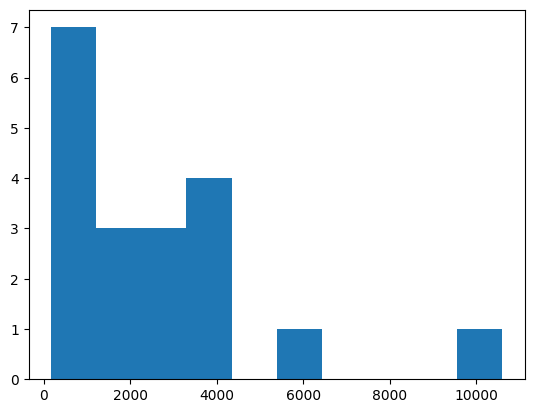

In [177]:
lengths = [len(group_array) for group_array in group_arrays]
plt.hist(lengths)

In [175]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

data_pad = pad_sequences(group_arrays, dtype='float32', padding='post', value=-1000)
data_pad.shape

(19, 10592, 17)

### Split train + test

In [185]:



X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.3, shuffle=False)

X_train.shape() 

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

## init_model

In [111]:
# def init_model(input_shape):
    

    # 1 - RNN architecture
    # ======================    
    # model = models.Sequential()    
    # # Normalizing Inputs
    # # model.add(normalizer)
    
    # # Recurrent Layer
    # model.add(layers.LSTM(units=64, activation='tanh', return_sequences=False, 
    #                       recurrent_dropout=0.5, dropout=0.5, input_shape=input_shape))
    
    # # Hidden Dense Layer that we are regularizing
    # # reg_l2 = regularizers.L2(0.5)
    # # model.add(layers.Dense(32, activation="relu", kernel_regularizer = reg_l2))
    
    # model.add(layers.Dense(32, activation="relu"))
    # model.add(layers.Dropout(rate=0.5))
    
    # # Predictive Dense Layer
    # ### model.add(layers.Dense(1, activation='linear'))  
    
    # model.add(layers.Dense(1, activation='sigmoid'))
    
    # # model.build(input_shape=(None, input_shape)) 
 

    # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

    # return model

In [120]:
def init_model(X_train):
        model = models.Sequential() 
        
        model.add(layers.LSTM(64, input_shape=(X_train.shape[0], X_train.shape[1])))
        
        model.add(layers.Dense(1, activation='sigmoid'))
        
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        
        return model

## Plot history

In [36]:
def plot_history(history):
    
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    # --- LOSS: binary_crossentropy --- 
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('binary_crossentropy')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- METRICS:accuracy ---
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('accuracy')
    ax[1].set_ylabel('accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
                        
    return ax

# Model test and tuning

In [124]:
input_shape = X_train.shape[1]
input_shape

17

In [121]:
model = init_model(X_train)
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 64)                20992     
                                                                 
 dense_30 (Dense)            (None, 1)                 65        
                                                                 
Total params: 21,057
Trainable params: 21,057
Non-trainable params: 0
_________________________________________________________________


In [123]:
es = EarlyStopping(monitor="val_loss",
                    patience=10,
                    mode="min",
                    restore_best_weights=True)

history = model.fit(X_train,
                    y_train,
                    validation_split=0.3,
                    shuffle=False,
                    batch_size=32,
                    epochs=100,
                    callbacks=[es],
                    verbose=1)

Epoch 1/100


ValueError: in user code:

    File "/home/pgducray/.pyenv/versions/3.10.6/envs/fishing_classification/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/home/pgducray/.pyenv/versions/3.10.6/envs/fishing_classification/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/pgducray/.pyenv/versions/3.10.6/envs/fishing_classification/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/home/pgducray/.pyenv/versions/3.10.6/envs/fishing_classification/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/home/pgducray/.pyenv/versions/3.10.6/envs/fishing_classification/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/pgducray/.pyenv/versions/3.10.6/envs/fishing_classification/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_19" is incompatible with the layer: expected shape=(None, 14000, 17), found shape=(None, 17)


<class 'pandas.core.frame.DataFrame'>
Index: 14000 entries, 0 to 13999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mmsi                     14000 non-null  float64
 1   distance_from_shore      14000 non-null  float64
 2   distance_from_port       14000 non-null  float64
 3   speed                    14000 non-null  float64
 4   course                   14000 non-null  float64
 5   lat                      14000 non-null  float64
 6   lon                      14000 non-null  float64
 7   type_drifting_longlines  14000 non-null  float64
 8   type_fixed_gear          14000 non-null  float64
 9   type_pole_and_line       14000 non-null  float64
 10  type_purse_seines        14000 non-null  float64
 11  type_trawlers            14000 non-null  float64
 12  type_trollers            14000 non-null  float64
 13  type_unknown             14000 non-null  float64
 14  year                     14